# Assignment – Model Selection

Do the following on titanic dataset

1. Load the dataset into python environment.

2. Do all the necessary pre-processing steps.

3. Create kNN and SVM models.

4. Do k-fold and stratified k-fold cross validation techniques and find the average accuracy score of the models. 

Import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the dataset into python environment.

In [2]:
df = pd.read_csv(r"C:\Users\ALFRED\Downloads\titanic_dataset .csv")

Analysing the data and doing necessary preprocessing.

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df = df.drop(['PassengerId','Name','Ticket'], axis = 1)

Here, we dropped columns that is not necessary in the model building.

In [5]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [6]:
df.shape

(891, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Missing value handling

In [9]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

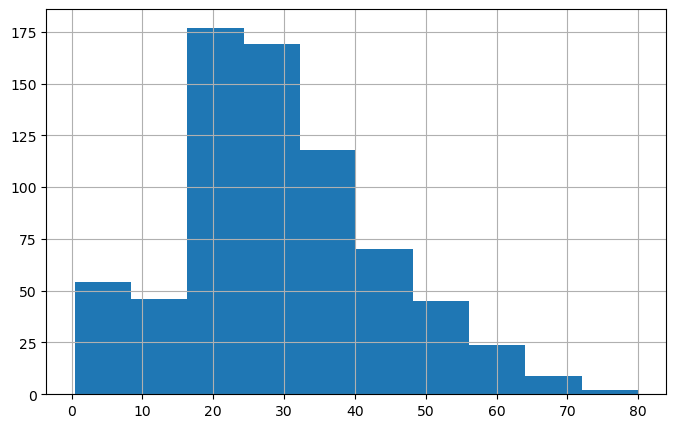

In [11]:
freqgraph = df['Age']
freqgraph.hist(figsize = (8,5))
plt.show()

There are 3 columns with missing values in it, Age, Embarked and Cabin. Here age column is a numerical column and has an almost normal distribution, so we replace the missing values with mean whereas embarked is a categorical column and we replaced it with the mode. In case of the cabin column, since almost more than 75% of the data is missing we shall rather drop that column.

In [12]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [13]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [14]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

In [15]:
df = df.drop(['Cabin'], axis = 1)

In [16]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

Outlier handling

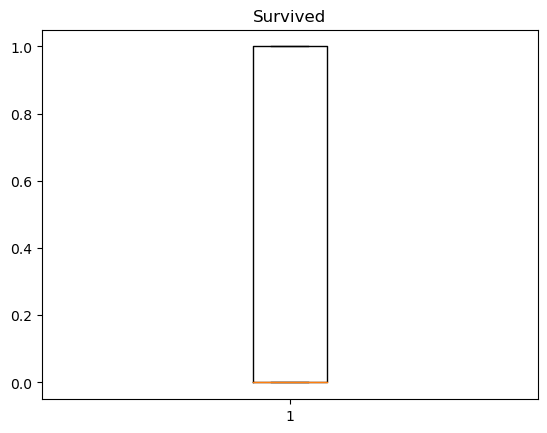

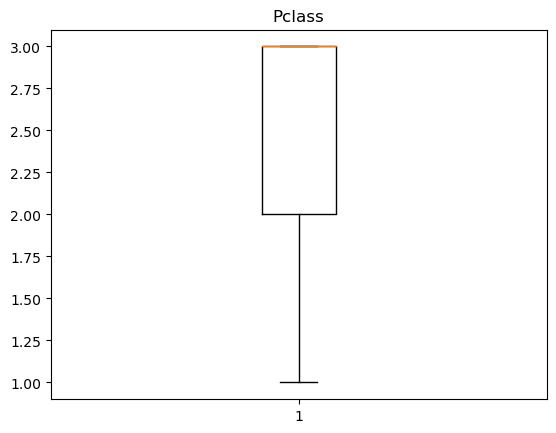

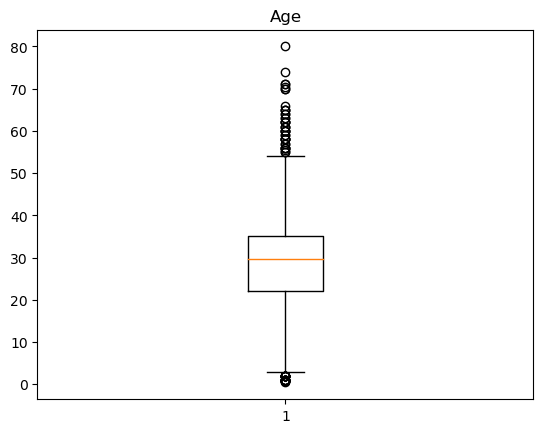

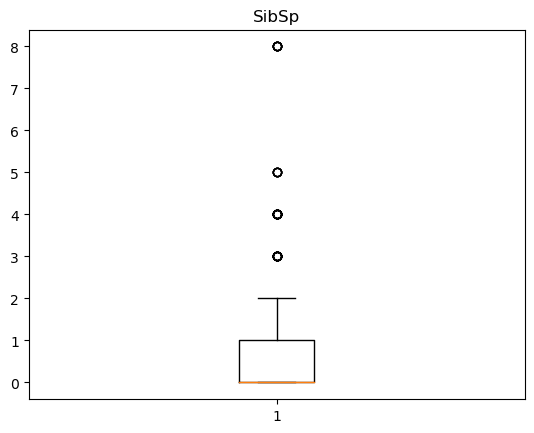

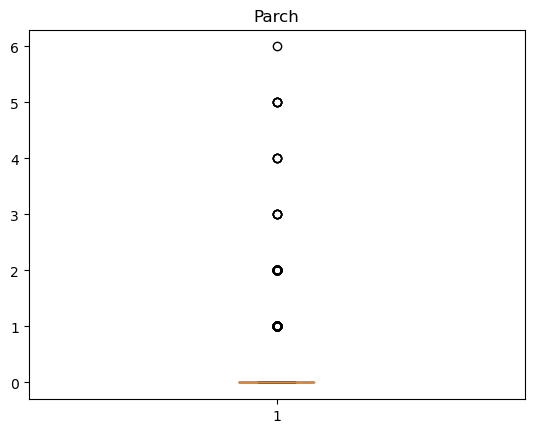

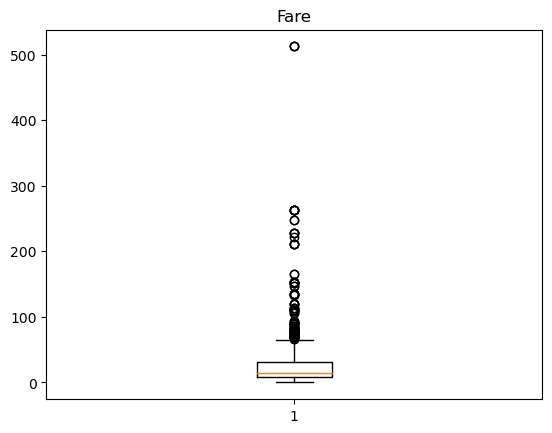

In [17]:
num_col = ['Survived', 'Pclass','Age', 'SibSp', 'Parch','Fare']
for i in num_col:
    plt.figure()
    plt.boxplot(df[i])
    plt.title(i)

Here, Age, SibSp, Parch & Fare columns are showing outliers. But SibSp & Parch are columns with a very less number of unique values and are showing the data of family members, so we avoid outlier handling for them. Now for age and fare columns, we do flooring and capping to get rid of outliers.

In [18]:
Q1 = np.percentile(df['Fare'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df['Fare'], 50, interpolation = 'midpoint')
Q3 = np.percentile(df['Fare'], 75, interpolation = 'midpoint')

C:\Users\ALFRED\AppData\Local\Temp\ipykernel_18600\3191469563.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['Fare'], 25, interpolation = 'midpoint')
C:\Users\ALFRED\AppData\Local\Temp\ipykernel_18600\3191469563.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(df['Fare'], 50, interpolation = 'midpoint')
C:\Users\ALFRED\AppData\Local\Temp\ipykernel_18600\3191469563.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower',

In [19]:
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [20]:
df['Fare'].median()

14.4542

In [21]:
IQR = Q3 - Q1
print(IQR)

23.0896


In [22]:
up_lim = Q3+1.5*IQR
low_lim = Q1 - 1.5*IQR
print(up_lim)
print(low_lim)

65.6344
-26.724


In [23]:
outliers = []
for x in df['Fare']:
    if(x>up_lim) or (x<low_lim):
        outliers.append(x)

In [24]:
df['Fare']=np.where(df['Fare']>up_lim,up_lim,np.where(df['Fare']<low_lim,low_lim,df['Fare']))

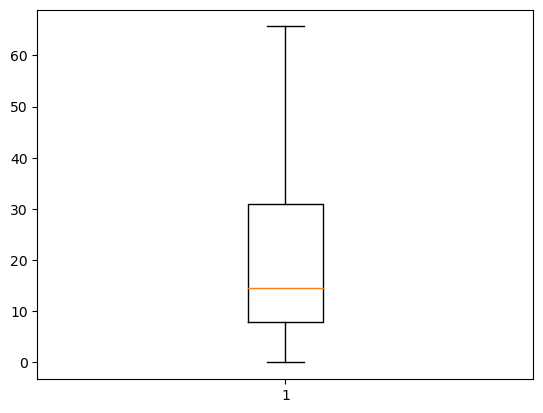

In [25]:
plt.boxplot(df['Fare'])
plt.show()

In [26]:
Q1 = np.percentile(df['Age'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df['Age'], 50, interpolation = 'midpoint')
Q3 = np.percentile(df['Age'], 75, interpolation = 'midpoint')

C:\Users\ALFRED\AppData\Local\Temp\ipykernel_18600\1684468193.py:1: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['Age'], 25, interpolation = 'midpoint')
C:\Users\ALFRED\AppData\Local\Temp\ipykernel_18600\1684468193.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(df['Age'], 50, interpolation = 'midpoint')
C:\Users\ALFRED\AppData\Local\Temp\ipykernel_18600\1684468193.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', '

In [27]:
print(Q1)
print(Q2)
print(Q3)

22.0
29.69911764705882
35.0


In [28]:
df['Age'].median()

29.69911764705882

In [29]:
IQR = Q3 - Q1
print(IQR)

13.0


In [30]:
up_lim = Q3 + 1.5*IQR
low_lim = Q1 - 1.5*IQR
print(up_lim)
print(low_lim)

54.5
2.5


In [31]:
outliers = []
for x in df['Age']:
    if(x>up_lim) or (x<low_lim):
        outliers.append(x)

In [32]:
df['Age']=np.where(df['Age']>up_lim,up_lim, np.where(df['Age']<low_lim,low_lim,df['Age']))

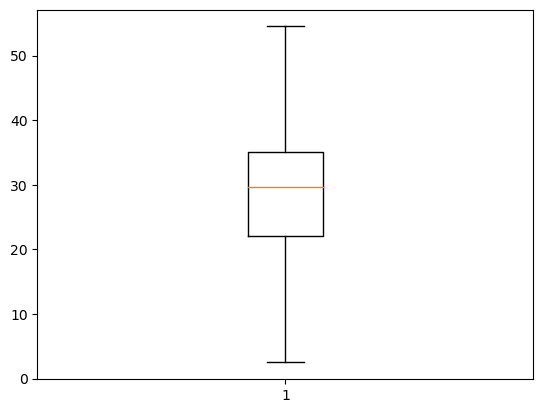

In [33]:
plt.boxplot(df['Age'])
plt.show()

Modelling

In [34]:
x = df.drop('Survived',axis = 1) # Features
y = df['Survived']               # Target

In [35]:
x.shape

(891, 7)

In [36]:
x = pd.get_dummies(x) # One hot encoding for categorical columns.

In [37]:
x.shape

(891, 10)

In [38]:
x.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,65.6344,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

kNN

In [42]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [43]:
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred_knn = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

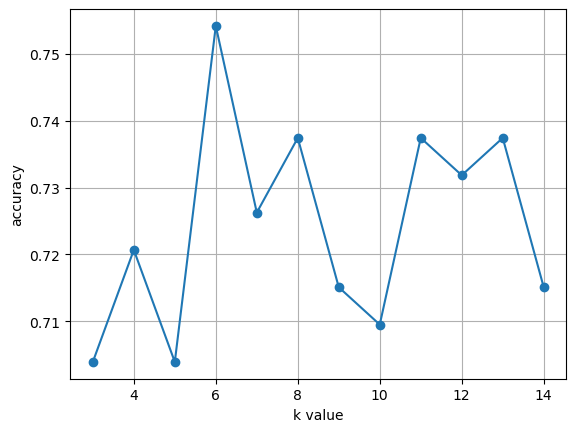

In [44]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [45]:
classifier = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)

In [46]:
print('Accuracy = ',accuracy_score(y_test,y_pred_knn))
print('precision = ',precision_score(y_test,y_pred_knn))
print('Recall = ',recall_score(y_test,y_pred_knn))
print('f1 score =',f1_score(y_test,y_pred_knn))

Accuracy =  0.7541899441340782
precision =  0.7884615384615384
Recall =  0.5540540540540541
f1 score = 0.6507936507936507


In [47]:
confusion_matrix(y_test,y_pred_knn)

array([[94, 11],
       [33, 41]], dtype=int64)

kNN gives an accuracy of 75%

SVM

In [48]:
from sklearn.svm import SVC
svmclf = SVC(kernel = 'linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [49]:
y_pred = svmclf.predict(x_test)

In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy is:', accuracy_score(y_test,y_pred))

Accuracy is: 0.7821229050279329


In [51]:
print(confusion_matrix(y_test,y_pred))

[[88 17]
 [22 52]]


SVM gives us an accuracy of 78%

Now to finalise which model to use, we use cross validation techniques. here, we use k fold and stratified k fold techniques to find out the best model.

K Fold Cross validation

In [52]:
from sklearn.model_selection import KFold

In [53]:
kfold_validator = KFold(10)

In [54]:
from sklearn.model_selection import cross_val_score

In [55]:
cv_result = cross_val_score(classifier, x, y, cv = kfold_validator) # Here we use kNN.

In [56]:
cv_result

array([0.64444444, 0.71910112, 0.73033708, 0.71910112, 0.71910112,
       0.74157303, 0.70786517, 0.71910112, 0.78651685, 0.75280899])

In [57]:
np.mean(cv_result) #finding the mean of all accuracies.

0.7239950062421971

In [59]:
cv_result1 = cross_val_score(svmclf, x, y, cv = kfold_validator) # Here we use SVM.

In [60]:
cv_result1

array([0.81111111, 0.82022472, 0.75280899, 0.84269663, 0.76404494,
       0.79775281, 0.74157303, 0.73033708, 0.84269663, 0.76404494])

In [61]:
np.mean(cv_result1) #finding the mean of all accuracies.

0.786729088639201

Using the K fold technique, kNN gave an accuracy of 72.39% while SVM gave an accuracy of 78.67%

Stratified K Fold Cross validation

In [62]:
from sklearn.model_selection import StratifiedKFold

In [63]:
skfold_validator = StratifiedKFold(n_splits = 10)

In [64]:
skcv_result = cross_val_score(classifier, x, y, cv = skfold_validator) # Here we use kNN

In [65]:
skcv_result

array([0.65555556, 0.69662921, 0.69662921, 0.76404494, 0.75280899,
       0.70786517, 0.76404494, 0.73033708, 0.74157303, 0.74157303])

In [66]:
np.mean(skcv_result) #finding the mean of all accuracies.

0.7251061173533084

In [67]:
skcv_result1 = cross_val_score(svmclf, x, y, cv = skfold_validator) # Here we use SVM

In [68]:
skcv_result1

array([0.81111111, 0.79775281, 0.76404494, 0.84269663, 0.79775281,
       0.7752809 , 0.76404494, 0.74157303, 0.80898876, 0.76404494])

In [69]:
np.mean(skcv_result1) #finding the mean of all accuracies.

0.786729088639201

Using Stratified K Fold Cross validation technique, kNN gave an accuracy of 72.51% while SVM gave an accuracy of 78.67%

So, in conclusion, we can say that SVM gave us a better result in both the cross validation techniques.